# Feature Detection

OpenCV를 사용하여 다음과 같은 다양한 feature detection 알고리즘을 사용해본다.

- Harris corner detection
- FAST
- ORB (Oriented FAST and Rotated BRIEF)
- SIFT (Scale-Invariant Feature Transform)
- SURF (Speeded-Up Robust Features)


**참고**

- [OpenCV tutorial - Feature Detection and Description](https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html)
- [OpenCV document](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html)
- [이미지 특징 추출 (데이터 사이언스 스쿨)](https://datascienceschool.net/03%20machine%20learning/03.02.05%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%ED%8A%B9%EC%A7%95%20%EC%B6%94%EC%B6%9C.html)


# OpenCV 버전 변경

SIFT, SURF Feature 사용을 위해 현재 Colab 서버에 설치되어 있는 OpenCV 버전을 변경한다.

In [ ]:
!pip3 uninstall opencv-python
!pip3 uninstall opencv-contrib-python
!pip3 install opencv-contrib-python==3.4.18.65

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.7.0.72.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-16a334ab.so.59.37.100
    /usr/local/lib/py

In [ ]:
# 관련 패키지 임포트
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
numpy 1.22.4
opencv 3.4.18


In [ ]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ROOT = '/content/drive/MyDrive/Colab Notebooks/'

### opencv를 사용해 이미지 불러오기

- `cv.imread()`를 이용해 이미지를 불러오면 RGB가 아닌 BGR 이미지임을 유의해야 한다.

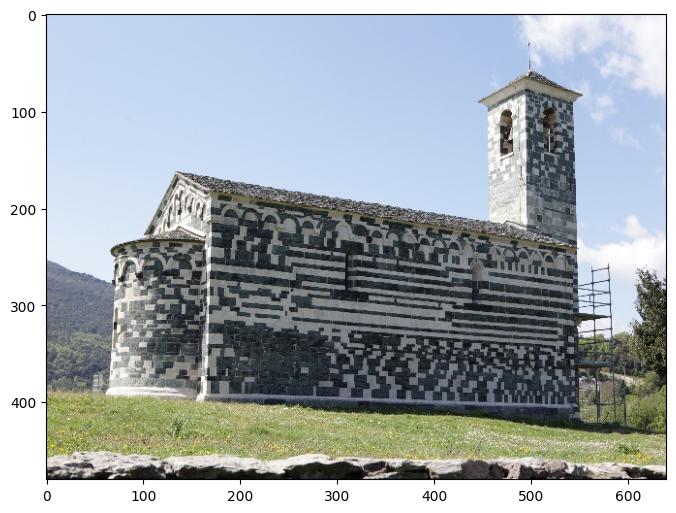

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
#img = cv.cvtColor(img, cv.COLOR_BGR2RGB) 이 방식으로도 변경할 수 있다.

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()

## Harris Corner Detection

해리스 코너 추출 함수 `cornerHarris`는 이미지 위에 커널을 이동시키면서 그레디언트의 변화량을 구하고 이 값을 적절한 기준값으로 구별하여 코너점을 찾는다.

- 해리스 코너를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수
`dst	=	cv.cornerHarris(	src, blockSize, ksize, k[, dst[, borderType]]	)`


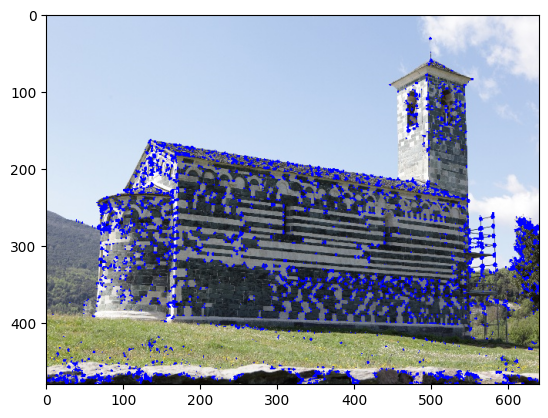

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
#dst = cv.cornerHarris(gray, blocksize, ksize, k[ , dst[, borderType]]) # 코너 검출
dst = cv.cornerHarris(gray, blockSize=3, ksize=3, k=0.04)
dst = cv.threshold(dst, 0.01*dst.max(), 255, cv.THRESH_BINARY)[1]
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # BGR에서 RGB로 변환
img_rgb[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.imshow(img_rgb)
plt.show()

### Fast Corner Detection

연산이 빠른 corner detection 알고리즘이다


- FAST feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.FastFeatureDetector_create(	[, threshold[, nonmaxSuppression[, type]]]	)`

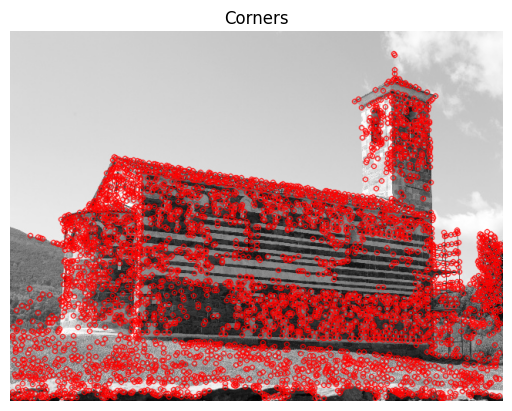

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
retval = cv.FastFeatureDetector_create(threshold=40, nonmaxSuppression=True)

keypoints = retval.detect(gray, None)
img_with_keypoints = cv.drawKeypoints(gray, keypoints, None, color=(0, 0, 255))

plt.imshow(cv.cvtColor(img_with_keypoints, cv.COLOR_BGR2RGB))
plt.title('Corners')
plt.axis('off')
plt.show()

### ORB(Oriented FAST and Rotated BRIEF) detector

FAST 와 BRIEF를 기반으로 만들어진 알고리즘이다. 논문에서는 SURF와 SIFT보다 매우 빠르고, SURF 보다 정확한, 낮은 컴퓨팅 파워 환경에서 돌리기에 좋은 알고리즘이라 소개 한다.

-  ORB feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.ORB_create(	[, nfeatures[, scaleFactor[, nlevels[, edgeThreshold[, firstLevel[, WTA_K[, scoreType[, patchSize[, fastThreshold]]]]]]]]]	)`


머신러닝 직전에서 ORB가 업계 Standard이다.

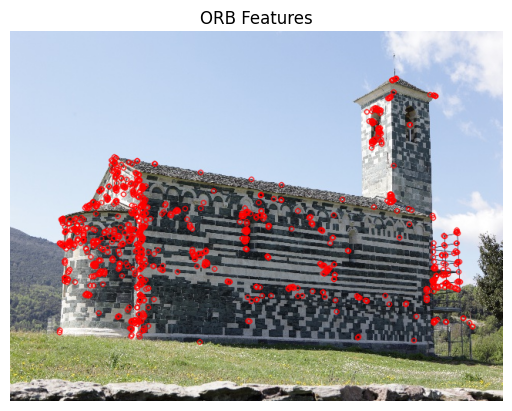

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
orb = cv.ORB_create(nfeatures=1000)

# ORB feature 검출
keypoints, descriptors = orb.detectAndCompute(gray, None)

# 검출된 feature 시각화
img_with_keypoints = cv.drawKeypoints(img, keypoints, None, color=(0, 0, 255), flags=0)

plt.imshow(cv.cvtColor(img_with_keypoints, cv.COLOR_BGR2RGB))
plt.title('ORB Features')
plt.axis('off')
plt.show()

### SIFT feature detection

SIFT(Scale-Invariant Feature Transform)은 특징점의 크기와 각도까지 같이 계산하여 이미지의 크기가 변하거나 회전해도 동일한 특징점을 찾을 수 있도록 하는 방법이다. 또한 특징점 근처의 이미지 특성(히스토그램)도 같이 계산해서 특징점 이미지의 모양도 구별할 수 있도록 한다.

- SIFT feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`retval	=	cv.SIFT_create(	[, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]	)
`

In [ ]:
# 아래 패키지를 임포트한다
!pip install opencv-contrib-python-nonfree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-contrib-python-nonfree (from versions: none)
ERROR: No matching distribution found for opencv-contrib-python-nonfree


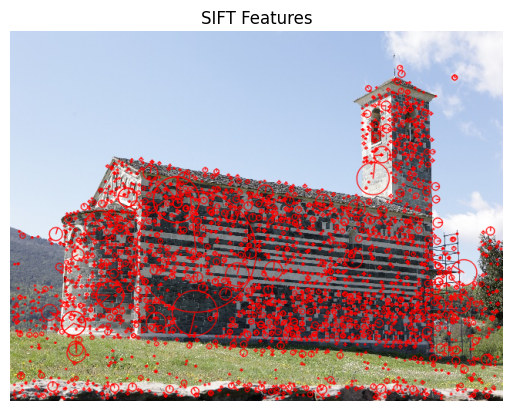

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# To-do
sift = cv.SIFT_create(nfeatures=0, nOctaveLayers=3, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6)

keypoints, descriptors = sift.detectAndCompute(gray, None) # feature 검출

# feature 시각화
img_with_keypoints = cv.drawKeypoints(img, keypoints, None, color=(0, 0, 255), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(cv.cvtColor(img_with_keypoints, cv.COLOR_BGR2RGB))
plt.title('SIFT Features')
plt.axis('off')
plt.show()

1. Harris Corner Detection:

=> 코너를 검출하기 위해 픽셀의 밝기 변화를 활용하는 알고리즘 입니다. 코너의 특징은 픽셀 주변 영역의 밝기 변화가 크기 때문에 이를 감지합니다.
장점:
간단한 알고리즘입니다.
코너를 다양한 방향에서 검출할 수 있습니다.
단점:
크기가 변하는 객체에 대해 성능이 떨어질 수 있습니다.
차이점 : 정확도와 견고성 측면에서 다른 알고리즘들과 비교하면 상대적으로 성능이 떨어질 수 있습니다.

2. Fast Corner Detection:

=> 코너를 빠르게 검출하기 위해 개발된 알고리즘입니다. 이미지 픽셀 중 일부만 사용하여 코너를 판단합니다.
장점:
매우 빠른 속도로 코너를 검출할 수 있습니다.
다양한 변형에 대해 견고한 성능을 보입니다.
단점:
일부 코너를 잘못 검출할 수 있는 오검출 문제가 있을 수 있습니다.
스케일 변화가 큰 경우에 대한 성능이 제한적입니다.

3. ORB (Oriented FAST and Rotated BRIEF) detection:

=> FAST와 BRIEF 기반의 알고리즘을 결합한 방법으로, 특징점 검출과 특징점 기술자 생성을 동시에 수행합니다.
장점:
높은 속도로 특징점 검출과 기술자 생성을 수행합니다.
회전과 크기 변화에 강인한 성능을 보입니다.
상대적으로 낮은 컴퓨팅 파워에서도 효율적으로 동작합니다.
단점:
일부 코너에서 정확도가 낮을 수 있습니다.
다른 알고리즘들에 비해 상대적으로 디스크립터의 품질이 낮을 수 있습니다.

4. SIFT (Scale-Invariant Feature Transform) feature detection:

=> 다양한 크기와 회전 변화에 불변한 특징점을 검출하는 알고리즘입니다.
장점:
크기와 회전 변화에 불변한 특징점을 검출할 수 있습니다.
높은 정확도와 견고성을 보입니다.
일반적으로 다른 알고리즘들보다 더 강력한 특징을 가집니다.
단점:
계산 비용이 크고 복잡한 알고리즘이라 다른 알고리즘들에 비해 상대적으로 느릴 수 있습니다.